# Automotive Company Sales Analysis: 

This report includes exploratory data analysis on sales data for an automotive company based on 3 years of operations (2003, 2004, 2005). This report will aim to answer several questions, which will help us gain insight, and find out if there any deficiencies in the business process, to improve business performance.
>This report will include a Tableau dashboard for more in depth data visualization and insights.

## Table of Contents:
<ul>
    <li><a href='#datawrang'>Data Wrangling</a></li>
    <li><a href='#dataclean'>Data Cleaning</a></li>
    <li><a href='#data_anal'>Exploratory Data Analysis</a></li>
    <li><a href='#final'>Data Finalization</a></li>
</ul>

<a id='datawrang'></a>
### Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## this is used to show all contents of the output cell, instead of having [...] and the output truncated.
## If you don't want it, leave it commented it out.

## Alternatively, if you would like this to be permenant, you would have to make changes 
## to the ipython_config.py file in profile.default

In [3]:
df = pd.read_csv('./DataSource-main/sales_data.csv')

# if relative path does not work, you can change file path above & insert file path for 
# 'sales_data_sample.csv' located in 'DataSource-main' folder in this directory.

In [4]:
df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,05/07/2003,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
df.shape

(2823, 25)

In [7]:
df.duplicated().sum()

0

<a id='isnull_sum'></a>
<br>
We will check to see if there are any missing values in the dataset, and whether those missing values have any significance on the accuracy of the data.

In [8]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

> By observing the NaN values, we can see for example that 'Territory' has 1074 values missing. Those missing values may prove signifcant because maybe who entered the data for a specific country did not enter data for the territory, so that may reflect inaccurate results if we wanted to know which territory has the highest sales.

> However, they can be ignored and it wouldn't affect the accuracy of the dataset. Upon further exploration, demonstrated below, we find that NaN values in 'Territory' belong to multiple countries that have other values that are assigned a territory. This can reflect inaccurate results when comparing territories.

> Furthermore, we can find that the remaining NaN values for 'Address Line 2' & 'Postal Code' have no significance and are negligible.

In [9]:
df['COUNTRY'].value_counts()

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64

In [10]:
df['PRODUCTLINE'].value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

> By now, we have established an overview of the data, next we move on to cleaning the problematic aspects of the data that might give us a hard time later when importing the data into a mysql database and conducting further analysis using Tableau.

<a id='dataclean'></a>
### Data Cleaning

In [11]:
df.head(1)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.7,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small


In [12]:
df.rename(columns= lambda x: x.lower(), inplace=True)
df.head(1)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.7,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small


In [13]:
df.dtypes

ordernumber           int64
quantityordered       int64
priceeach           float64
orderlinenumber       int64
sales               float64
orderdate            object
status               object
qtr_id                int64
month_id              int64
year_id               int64
productline          object
msrp                  int64
productcode          object
customername         object
phone                object
addressline1         object
addressline2         object
city                 object
state                object
postalcode           object
country              object
territory            object
contactlastname      object
contactfirstname     object
dealsize             object
dtype: object

> Upon checking the dtypes, we find that the 'orderdate' column has an 'object' data type. We need to change it to datetime so that we can guarantee consistency.

In [14]:
df['orderdate'] = pd.to_datetime(df['orderdate'])
df.head(5)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


It seems like there are no other visible issues regarding the dataset, besides missing or NaN values. By looking at the function called earlier <a href='#isnull_sum'>'df.isnull().sum()'</a>, we can see that the NaN values correspond with columns that can be ignored, therefore those missing values can have signifance, if not ignored, on the accuracy and integrity of the data. 

<a id='data_anal'></a>
## Exploratory Data Analysis

> In this section, we will manipulate the data in order to answer questions.

<a id='here'></a>
#### Order Status Issue:

In [15]:
df['status'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: status, dtype: int64

> When examining the order status, we can find that there are several values for 'status'. We need to remove all values that aren't labelled 'Shipped' or 'Resolved' from the dataframe so that they don't reflect inaccurate sales values. As any value other than 'Shipped' or 'Resolved' indicates that the order has not been delivered, which means we can't account for its sales value.

We will update the dataframe to only show values with status **'Shipped'** & **'Resolved'**.

In [16]:
df = df[(df['status'] == 'Shipped') | (df['status'] == 'Resolved')]
df.reset_index(drop=True, inplace=True)
df

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,10337,42,97.16,5,4080.72,2004-11-21,Shipped,4,11,2004,Ships,54,S72_3212,Classic Legends Inc.,2125558493,5905 Pompton St.,Suite 750,NYC,NY,10022,USA,NaN,Hernandez,Maria,Medium
2660,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2661,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2662,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium


> As you can see, the new dataframe contains 2664 rows which corresponds to the sum of 'Shipped' & 'Resolved' values that were observed when we ran "df['status'].value_counts()" <a href='#here'>here</a>.

<br>

### In this next section, we will answer the following questions:
<ol>
    <li>What is the total number of sales by country ?</li>
    <li>Which month had the most sales ?</li>
    <li>What are the average monthly sales ?</li>
    <li>Which year had the most sales ?</li>
    <li>Which products sold the most ?</li>
    <li>When were the best and worst selling periods ?</li>
</ol>
<br>
<br>

#### 1. What is the total number of sales by country?

In [17]:
sales_by_country = df['sales'].groupby(df['country']).sum()

In [18]:
sales_by_country.nlargest(3)

country
USA       3416477.64
Spain     1098721.03
France    1067131.83
Name: sales, dtype: float64

In [19]:
sales_by_country.nsmallest(3)

country
Ireland         57756.43
Philippines     94015.73
Belgium        100000.67
Name: sales, dtype: float64

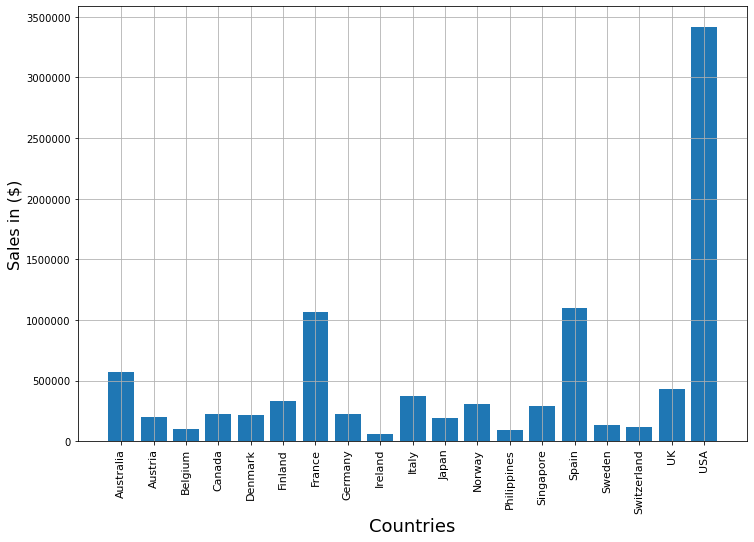

In [20]:
countries = [x for x, df in df.groupby('country')]

plt.subplots(figsize=(12, 8))
plt.ticklabel_format(style='plain')
plt.bar(countries, sales_by_country)
plt.xticks(countries, fontsize=11, rotation=90)
plt.xlabel('Countries', fontsize=18)
plt.ylabel('Sales in ($)', fontsize=16)
plt.grid()
plt.show()

> Based on the graph above; USA has the highest sales, followed by Spain, France, and Australia. Lowest sales belong to Ireland, followed by Phillipines and Belgium.

<br>

#### 2. Which month had the most sales?

In [21]:
months = [x for x, df in df.groupby(df['orderdate'].dt.month_name())]
months

['April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September']

In [22]:
monthly_sales_df = df[['sales', 'quantityordered']].groupby(df['orderdate'].dt.month_name()).sum()
monthly_sales_df

,sales,quantityordered
orderdate,,
April,538976.00,5374
August,659310.57,6538
December,634679.12,6293
February,810441.90,7903
January,785874.44,7997
July,514875.97,4899
June,354337.88,3586
March,754501.39,7585
May,639368.06,6119


In [23]:
monthly_sales = df['sales'].groupby(df['orderdate'].dt.month_name()).sum()

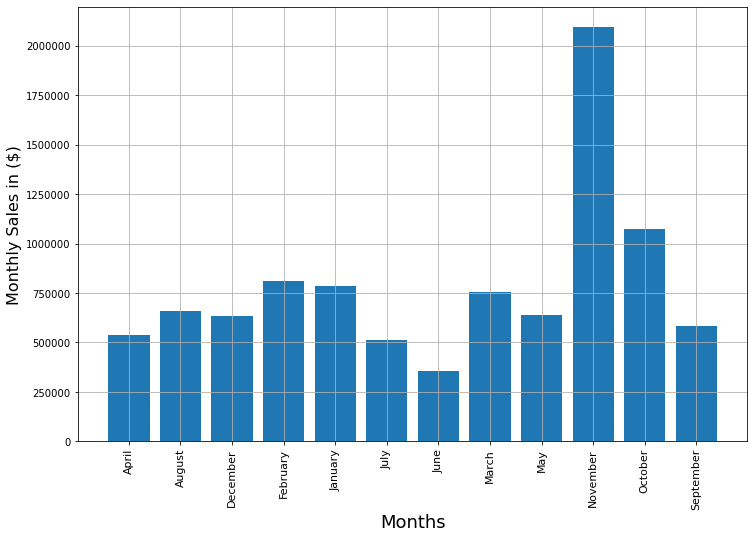

In [24]:
plt.subplots(figsize=(12, 8))
plt.ticklabel_format(style='plain')
plt.bar(months, monthly_sales)
plt.xticks(months, fontsize=11, rotation=90)
plt.xlabel('Months', fontsize=18)
plt.ylabel('Monthly Sales in ($)', fontsize=16)
plt.grid()
plt.show()

<br>

#### 3. What are the average monthly sales?

In [25]:
avg_monthly_sales_df = df[['sales', 'quantityordered']].groupby(df['orderdate'].dt.month_name()).mean()
avg_monthly_sales_df

,sales,quantityordered
orderdate,,
April,3569.377483,35.589404
August,3451.887801,34.230366
December,3525.995111,34.961111
February,3618.044196,35.281250
January,3431.766114,34.921397
July,3651.602624,34.744681
June,3508.295842,35.504950
March,3558.968821,35.778302
May,3717.256163,35.575581


In [26]:
avg_monthly_sales = df['sales'].groupby(df['orderdate'].dt.month_name()).mean()
avg_monthly_sales

orderdate
April        3569.377483
August       3451.887801
December     3525.995111
February     3618.044196
January      3431.766114
July         3651.602624
June         3508.295842
March        3558.968821
May          3717.256163
November     3540.821421
October      3563.137209
September    3419.440175
Name: sales, dtype: float64

In [27]:
avg_monthly_sales.nlargest(3)

orderdate
May         3717.256163
July        3651.602624
February    3618.044196
Name: sales, dtype: float64

In [28]:
avg_monthly_sales.nsmallest(3)

orderdate
September    3419.440175
January      3431.766114
August       3451.887801
Name: sales, dtype: float64

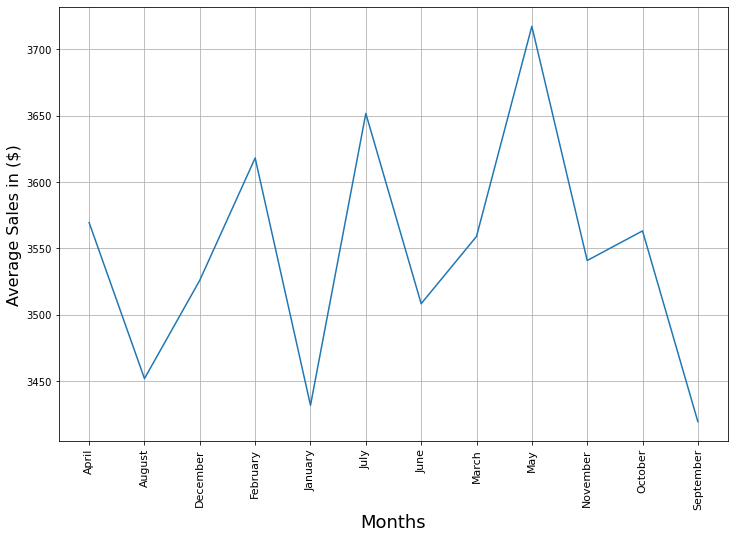

In [29]:
plt.subplots(figsize=(12, 8))
plt.ticklabel_format(style='plain')
plt.plot(months, avg_monthly_sales)
plt.xticks(months, fontsize=11, rotation=90)
plt.xlabel('Months', fontsize=18)
plt.ylabel('Average Sales in ($)', fontsize=16)
plt.grid()
plt.show()

> Based on the graph above, May seems to be the highest record of average monthly sales across all 3 years, followed by July, then February. Lowest record of average monthly sales across all 3 years were September, January, and August

<br>

#### 4. Which year had the most sales?

In [30]:
yearly_sales = df['sales'].groupby(df['year_id']).sum()
yearly_sales

year_id
2003    3468268.62
2004    4552125.83
2005    1421824.91
Name: sales, dtype: float64

In [31]:
year = [year for year, df in df.groupby('year_id')]
year

[2003, 2004, 2005]

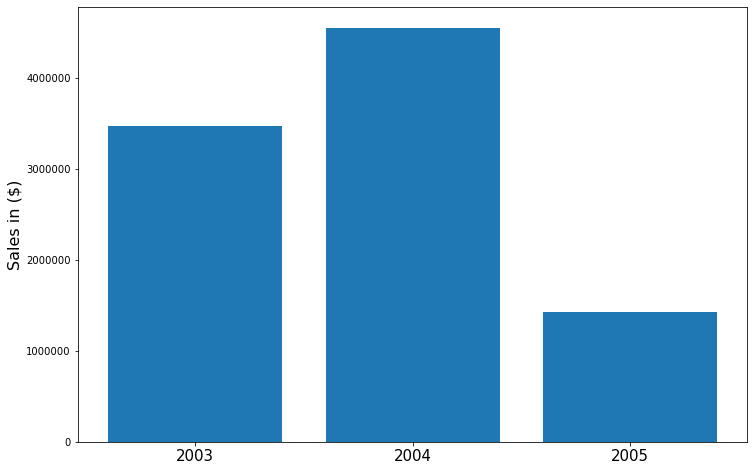

In [32]:
plt.subplots(figsize=(12, 8))
plt.ticklabel_format(style='plain')
plt.bar(year, yearly_sales)
plt.xticks(year, fontsize=15)
plt.ylabel('Sales in ($)', fontsize=16)
plt.show()

> The year 2004 had the highest sales

<br>

#### 5. Which products sold the most ?

In [33]:
df[['sales', 'quantityordered']].groupby(df['productline']).sum().sort_values(by='quantityordered', ascending=False)

,sales,quantityordered
productline,,
Classic Cars,3727559.67,32249
Vintage Cars,1773127.19,19598
Motorcycles,1129573.83,11355
Trucks and Buses,1064570.14,10212
Planes,900999.49,9831
Ships,631036.47,7196
Trains,215352.57,2622


In [34]:
prod_sales = df['sales'].groupby(df['productline']).sum()
prod_sales

productline
Classic Cars        3727559.67
Motorcycles         1129573.83
Planes               900999.49
Ships                631036.47
Trains               215352.57
Trucks and Buses    1064570.14
Vintage Cars        1773127.19
Name: sales, dtype: float64

In [35]:
prod_sales.nlargest(2)

productline
Classic Cars    3727559.67
Vintage Cars    1773127.19
Name: sales, dtype: float64

In [36]:
prod_quant = df['quantityordered'].groupby(df['productline']).sum()
prod_quant

productline
Classic Cars        32249
Motorcycles         11355
Planes               9831
Ships                7196
Trains               2622
Trucks and Buses    10212
Vintage Cars        19598
Name: quantityordered, dtype: int64

In [37]:
prod_quant.nlargest(2)

productline
Classic Cars    32249
Vintage Cars    19598
Name: quantityordered, dtype: int64

In [38]:
products = [x for x, df in df.groupby('productline')]
products

['Classic Cars',
 'Motorcycles',
 'Planes',
 'Ships',
 'Trains',
 'Trucks and Buses',
 'Vintage Cars']

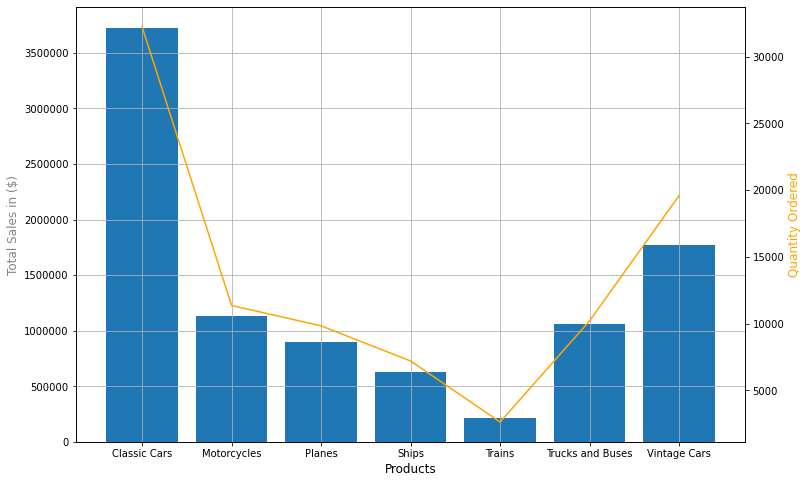

In [39]:
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.ticklabel_format(style='plain')
plt.grid()

ax2 = ax1.twinx()

ax1.bar(products, prod_sales)
ax2.plot(products, prod_quant, color='orange')

ax1.set_xlabel('Products', fontsize=12)
ax1.set_ylabel('Total Sales in ($)', color=(0.2, 0.2, 0.2, 0.6), fontsize=12)
ax2.set_ylabel('Quantity Ordered', color='orange', fontsize=12)

plt.show()

> Based on the graph above, we can conclude that Classic Cars & Vintage Cars are the most-selling products, they are the product lines that generate the most revenue.

<br>

#### 6. When were the best and worst selling periods ?

> to answer this question we will conduct a Time Series Analysis.

In [40]:
time_series = df['sales'].groupby(df['orderdate']).mean()

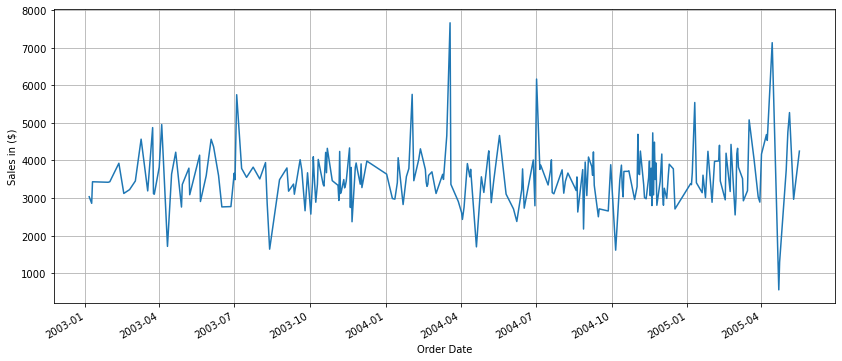

In [41]:
time_series.plot.line(grid='on', figsize=(14, 6), xlabel='Order Date', ylabel='Sales in ($)')
plt.show()

> According to the line chart above, the best selling periods were around the **1<sup>st</sup>** quarter in **2004** and the **2<sup>nd</sup>** quarter in **2005**. The worst selling period was around the **2<sup>nd</sup>** quarter in **2005**.

<a id='final'></a>
## Data Finalization

Exporting the dataset to a .csv file

In [43]:
df.to_csv('./sales_data_updated.csv', index=False)